In [38]:
!pip install pandas matplotlib prophet

<ipython-input-25-ab0b547faad6>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue'] = df['Quantity'] * df['UnitPrice']  # Create Revenue column
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_i75cq6p/dedfnhci.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_i75cq6p/r2478x_s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45659', 'data', 'file=/tmp/tmp_i75cq6p/dedfnhci.json', 'init=/tmp/tmp_i75cq6p/r2478x_s.json', 'output', 'file=/tmp/tmp_i75cq6p/prophet_model69kb9uj1/prophet_model-202504280

Max date in dataset: 2011-12-09 12:50:00


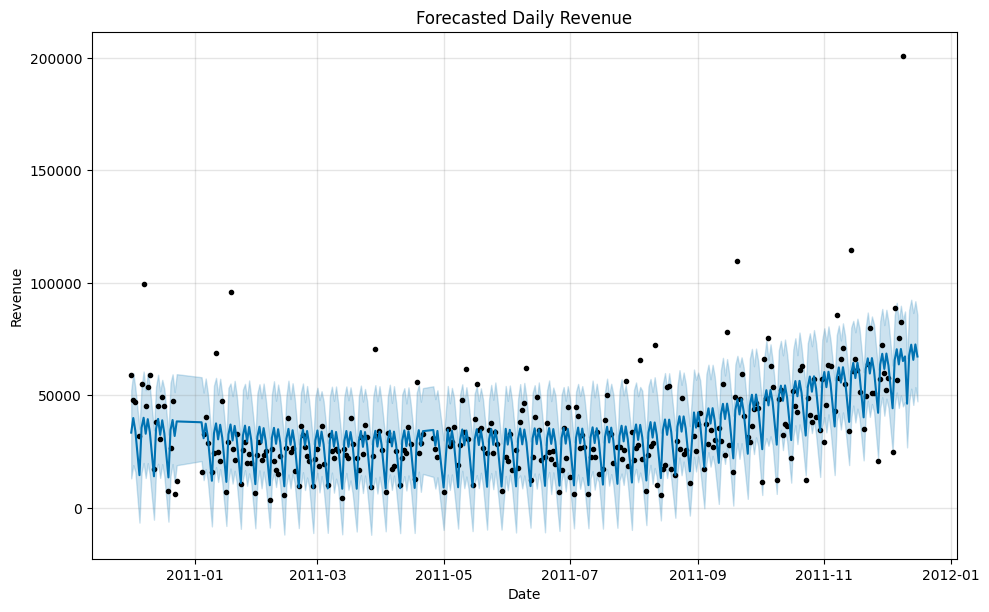

          Date  Predicted_Revenue  Lower_Bound  Upper_Bound
305 2011-12-10           67314.77     47020.67     87317.03
306 2011-12-11           46286.44     26856.61     66458.86
307 2011-12-12           67772.78     47014.95     88007.69
308 2011-12-13           72524.76     52952.72     92527.22
309 2011-12-14           65784.56     45739.00     86624.45
310 2011-12-15           72629.82     53620.79     91866.36
311 2011-12-16           67264.46     47330.17     85690.71


In [25]:
# 1. Import necessary libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt



In [26]:
# 2. Load your full dataset
df = pd.read_csv('/content/data.csv', encoding='unicode_escape')  # Your path




In [27]:
# 3. Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')  # Handle errors during conversion







In [28]:
# 4. Handle missing values
# Drop rows with missing InvoiceDate or negative/zero revenue (potentially erroneous data)
df.dropna(subset=['InvoiceDate'], inplace=True)  # Drop rows with missing InvoiceDate
df = df[df['Quantity'] > 0]  # Filter out rows where quantity is <= 0
df['Revenue'] = df['Quantity'] * df['UnitPrice']  # Create Revenue column




<ipython-input-28-535f60d24271>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue'] = df['Quantity'] * df['UnitPrice']  # Create Revenue column


In [29]:
# 5. Check maximum date in data
print("Max date in dataset:", df['InvoiceDate'].max())  # Should print 2011-12-09



Max date in dataset: 2011-12-09 12:50:00


In [30]:
# 6. Group by InvoiceDate (daily revenue)
daily_revenue = df.groupby(df['InvoiceDate'].dt.date)['Revenue'].sum().reset_index()




In [31]:
# 7. Rename columns for readability
daily_revenue.columns = ['Date', 'Daily_Revenue']  # Rename columns to be more understandable
daily_revenue['Date'] = pd.to_datetime(daily_revenue['Date'])  # ensure 'Date' is in datetime format



In [32]:
# 8. Prepare DataFrame for Prophet
daily_revenue.rename(columns={'Date': 'ds', 'Daily_Revenue': 'y'}, inplace=True)  # Rename for Prophet compatibility




In [33]:
# 9. Initialize and fit the model
model = Prophet(daily_seasonality=True)
model.fit(daily_revenue)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_i75cq6p/baczmuqf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_i75cq6p/bqixtiou.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44297', 'data', 'file=/tmp/tmp_i75cq6p/baczmuqf.json', 'init=/tmp/tmp_i75cq6p/bqixtiou.json', 'output', 'file=/tmp/tmp_i75cq6p/prophet_modelgvkoqknj/prophet_model-20250428095200.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:52:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:52:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [34]:
# 10. Create future dataframe for 7 days
future = model.make_future_dataframe(periods=7)


In [35]:
# 11. Predict
forecast = model.predict(future)


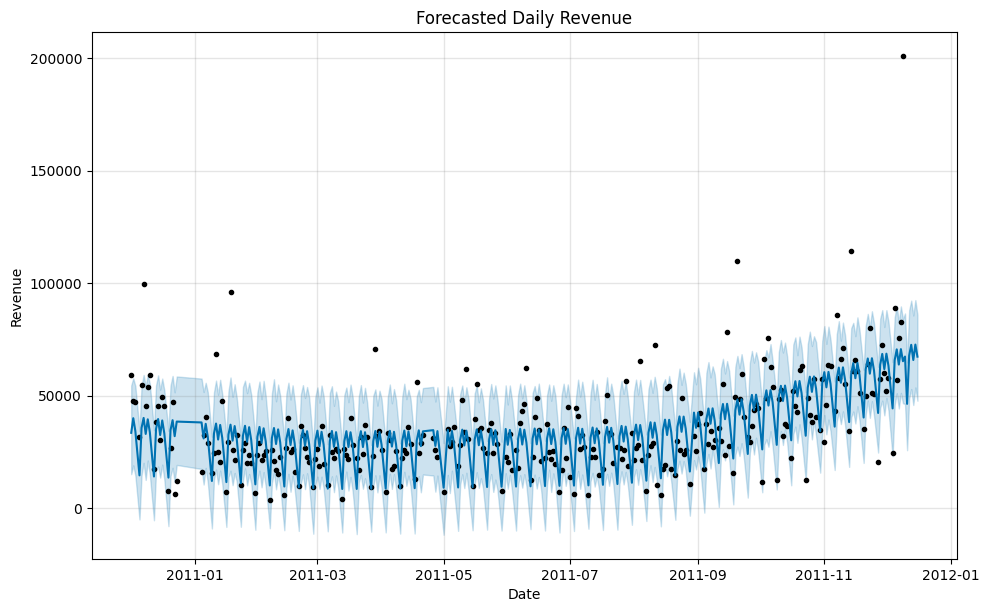

In [36]:
# 12. Visualize forecast
fig1 = model.plot(forecast)
plt.title('Forecasted Daily Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

In [37]:
# 13. Show only next 7 days forecast
forecast_next_7_days = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7).round(2)
forecast_next_7_days.columns = ['Date', 'Predicted_Revenue', 'Lower_Bound', 'Upper_Bound']  # Rename for readability
print(forecast_next_7_days)

          Date  Predicted_Revenue  Lower_Bound  Upper_Bound
305 2011-12-10           67314.77     46251.32     86468.93
306 2011-12-11           46286.44     25679.29     64702.48
307 2011-12-12           67772.78     48731.92     87885.94
308 2011-12-13           72524.76     52863.92     92172.48
309 2011-12-14           65784.56     45775.47     85571.55
310 2011-12-15           72629.82     53584.47     92404.30
311 2011-12-16           67264.46     47658.35     85864.19
